In [25]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('Promosi VS Penjualan.csv')

In [27]:
df

,Wilayah,Promosi,Penjualan
0,1,248,1713
1,2,210,1664
2,3,207,1666
3,4,153,1684
4,5,169,1636
5,6,195,1606
6,7,186,1651
7,8,188,1712
8,9,198,1736
9,10,195,1668


In [28]:
df = df.drop('Wilayah', axis = 1)

In [29]:
df

,Promosi,Penjualan
0,248,1713
1,210,1664
2,207,1666
3,153,1684
4,169,1636
5,195,1606
6,186,1651
7,188,1712
8,198,1736
9,195,1668


In [30]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### Exploratory Data Analysis (EDA)

#### Memeriksa Deskripsi Data

In [31]:
# Cek Nan
# Fungsi missing check
# Fungsi ini digunakan untuk mengecek jumlah missing value, keunikan tiap kolom
def missing_check(df) :
    wadah = []
    for i in df.columns :
        wadah.append(df[i].unique())
    missing = df.isnull().sum()
    per_miss = missing/len(df)
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing":missing,
                        "Percent_Missing":per_miss,
                        "Data_Types":data_type,
                        "Number_of_unique":number_unique,
                        "Unique":wadah}).style.format({'Percent_Missing': "{:.2%}"})
missing_check(df)

,Missing,Percent_Missing,Data_Types,Number_of_unique,Unique
Promosi,0,0.00%,int64,16,[248 210 207 153 169 195 186 188 198 154 156 171 229 223 225 150]
Penjualan,0,0.00%,int64,20,[1713 1664 1666 1684 1636 1606 1651 1712 1736 1668 1637 1716 1653 1775 1763 1816 1658 1590 1699 1661]


In [32]:
#melihat statistikal data
df.describe()

#potensi outlier di kolom BALANCE

,Promosi,Penjualan
count,20.000000,20.000000
mean,187.950000,1685.200000
std,29.780734,56.737252
min,150.000000,1590.000000
25%,155.500000,1652.500000
50%,191.500000,1667.000000
75%,207.750000,1713.750000
max,248.000000,1816.000000


In [33]:
# Menampilkan baris yang mengandung NaN
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan

,Promosi,Penjualan


In [34]:
#mengecek baris duplikat.
df_duplicated = df[df.duplicated(keep=False)]
df_duplicated

,Promosi,Penjualan


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [36]:
X_train

,Promosi
18,153
16,150
13,229
2,207
9,195
19,154
4,169
12,171
7,188
10,154


In [37]:
X_test

,Promosi
0,248
17,195
15,225
1,210
8,198
5,195
11,156
3,153


In [38]:
y_train

18    1699
16    1658
13    1775
2     1666
9     1668
19    1661
4     1636
12    1653
7     1712
10    1637
14    1763
6     1651
Name: Penjualan, dtype: int64

In [39]:
y_test

0     1713
17    1590
15    1816
1     1664
8     1736
5     1606
11    1716
3     1684
Name: Penjualan, dtype: int64

### Memeriksa Outlier

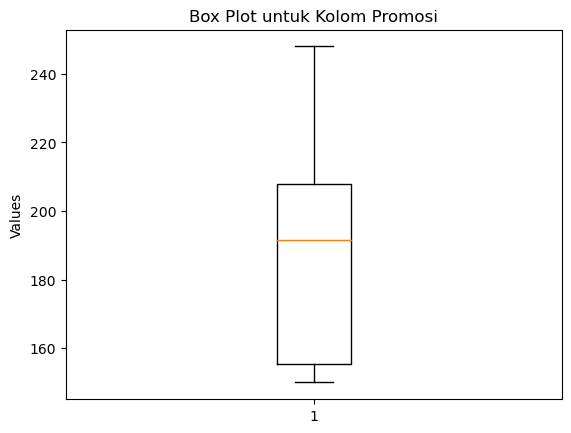

Kolom Promosi:
  Jumlah Outlier: 0
  Persentase Outlier: 0.00%
------------------------------


In [40]:
import matplotlib.pyplot as plt

# Fungsi untuk menghitung outlier
def calculate_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers.sum(), outliers.sum() / len(data) * 100  # Jumlah dan persentase outlier

# Daftar kolom (hanya Promosi pada kasus ini)
column = 'Promosi'

# Box plot untuk kolom Promosi
plt.figure()
plt.boxplot(df[column])
plt.title(f'Box Plot untuk Kolom {column}')
plt.ylabel('Values')
plt.show()

# Menghitung outlier
count, percentage = calculate_outliers(df[column])
print(f"Kolom {column}:")
print(f"  Jumlah Outlier: {count}")
print(f"  Persentase Outlier: {percentage:.2f}%")
print("-" * 30)


### Modeling

In [41]:
model = linear_model.LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
y_pred

array([1761.72012061, 1697.77156765, 1733.96886178, 1715.87021472,
       1701.39129706, 1697.77156765, 1650.71508529, 1647.09535587])

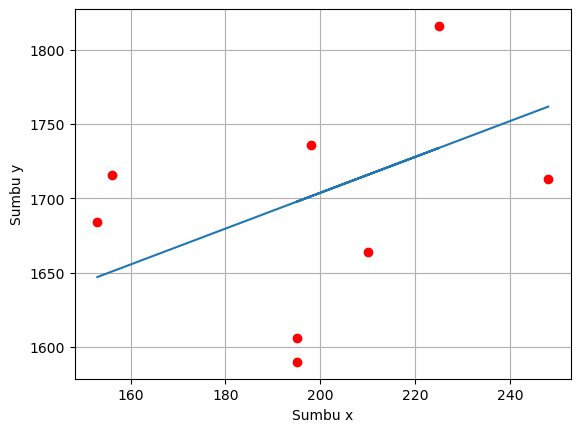

In [45]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred)
plt.grid(True)
plt.xlabel('Sumbu x')
plt.ylabel('Sumbu y')
plt.show()

In [47]:
print('Mean Absolute Error: ', round(sm.mean_absolute_error(y_test, y_pred), 2))
print('Mean Squared Error: ', round(sm.mean_absolute_error(y_test, y_pred), 2))
print('Median Absolute Error: ', round(sm.mean_absolute_error(y_test, y_pred), 2))
print('R2-Score: ', round(sm.mean_absolute_error(y_test, y_pred), 2))




Mean Absolute Error:  64.87
Mean Squared Error:  64.87
Median Absolute Error:  64.87
R2-Score:  64.87


In [58]:
New_data = np.array([150, 145, 170]).reshape(-1, 1)
New_data

array([[150],
       [145],
       [170]])

In [59]:
predict = model.predict(New_data)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
predict

array([1643.47562646, 1637.4427441 , 1667.60715588])